## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [110]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##

# 隨機森林 : 分類樹

In [111]:
# 載入資料集
dataset = datasets.load_breast_cancer()

# 分割資料
train_X, test_X, train_Y, test_Y = train_test_split(dataset.data, dataset.target, test_size=0.1, random_state=4)

# 設定隨機森林
rf = RandomForestClassifier(n_estimators=20)    # n_estimators : 樹的數量

# 訓練模型
rf.fit(train_X, train_Y)

# 預測資料
pred_Y = rf.predict(test_X)

# 計算分數(準確率)
score = metrics.accuracy_score(test_Y,pred_Y)

In [112]:
print("accuracy : ", score)

# 每個 feature 的重要程度(資料增益)
imp = pd.DataFrame({"feature":dataset.feature_names , "importance":rf.feature_importances_}).sort_values(by=['importance'],ascending=False)
#imp

accuracy :  0.9122807017543859


## 更改 n_estimators 數量 :
## 不同[樹的數量]對預測結果好壞影響
## 可以看出結果有好有壞，但是跟[樹的數量]多寡好像關係不大

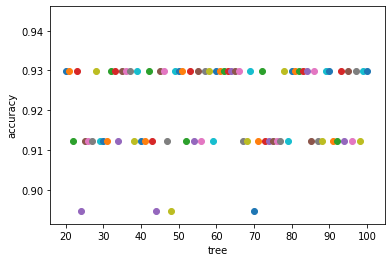

In [56]:
for i in range(20,101):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(train_X,train_Y)
    pred_Y = rf.predict(test_X)
    score = metrics.accuracy_score(test_Y,pred_Y)
    plt.scatter(i,score)

plt.xlabel("tree")
plt.ylabel('accuracy')
plt.show()

## 更改 max_depth 數量
## 樹最大深度對模型影響
## 似乎影響也不太明顯

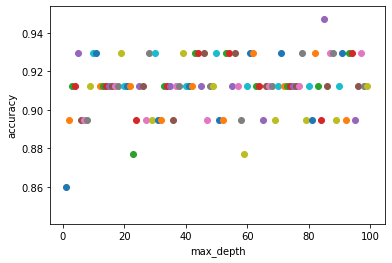

In [108]:
for i in range(1,100):
    rf = RandomForestClassifier(n_estimators=20, max_depth=i)
    rf.fit(train_X,train_Y)
    pred_Y = rf.predict(test_X)
    score = metrics.accuracy_score(test_Y,pred_Y)
    plt.scatter(i,score)

plt.xlabel("max_depth")
plt.ylabel('accuracy')
plt.show()

## 使用決策樹 :
## 可以明顯發現分數比隨機森林低

In [116]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(train_X,train_Y)
pred_Y = tree.predict(test_X)
score = metrics.accuracy_score(test_Y,pred_Y)
print("accuracy : ", score)

accuracy :  0.8947368421052632


##

##

# 隨機森林 : 回歸樹

In [88]:
# 載入資料集
dataset = datasets.fetch_california_housing()

# 分割資料
train_X, test_X, train_Y, test_Y = train_test_split(dataset.data, dataset.target, test_size=0.1, random_state=6)

# 設定隨機森林(回歸)
rf = RandomForestRegressor(n_estimators=100,criterion='mse')

# 訓練模型
rf.fit(train_X, train_Y)

# 預設資料
pred_Y = rf.predict(test_X)

# 分數(MSE)計算
score = metrics.mean_squared_error(test_Y,pred_Y)

In [92]:
# 印出 MSE 分數
print("MSE : ", score)

df = pd.DataFrame({'features':dataset.feature_names, 'importance':rf.feature_importances_})
df

MSE :  0.25322676159064866


,features,importance
0,MedInc,0.521173
1,HouseAge,0.053938
2,AveRooms,0.049090
3,AveBedrms,0.029656
4,Population,0.031958
5,AveOccup,0.136640
6,Latitude,0.089115
7,Longitude,0.088431


## 不同[樹的數量]對預測結果好壞影響
## 似乎有漸漸降低，但不明顯

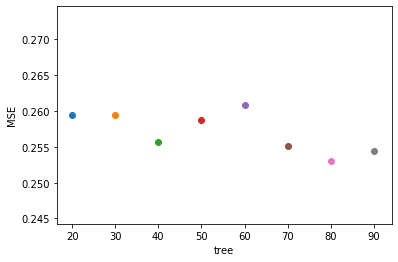

In [94]:
for i in range(20,100,10):
    rf = RandomForestRegressor(n_estimators=i)
    rf.fit(train_X,train_Y)
    pred_Y = rf.predict(test_X)
    score = metrics.mean_squared_error(test_Y, pred_Y)
    plt.scatter(i, score)

plt.xlabel("tree")
plt.ylabel("MSE")
plt.show()